In [21]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import math as m

In [22]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

In [23]:
yerr = 0.035339825186025027*np.abs(data[1])

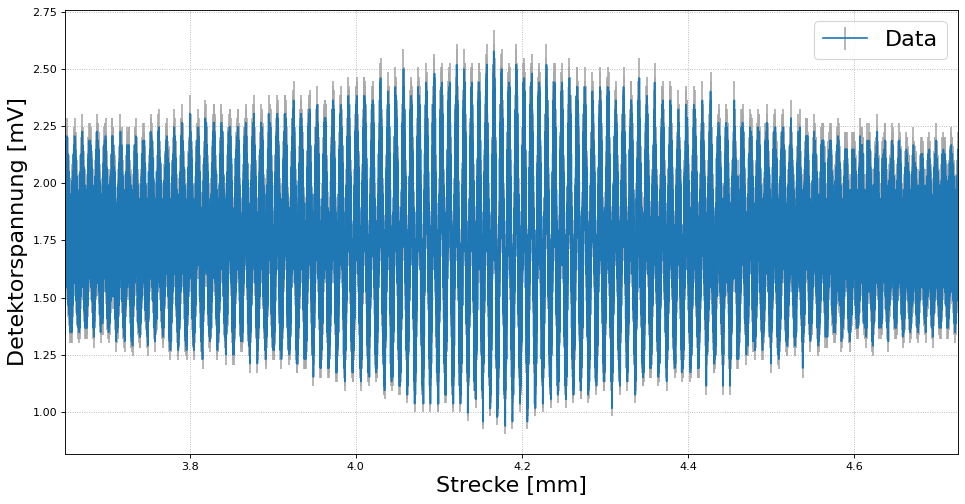

In [24]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,label = 'Data',ecolor='darkgray')

f.form([3.650,4.725],xlabel='Strecke [mm]',ylabel='Detektorspannung [mV]',name='Res/A5_interferogramm.pdf')

Wavelength: 3.6885711908825237e-06 m


/tmp/ipykernel_5683/607376199.py:20: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


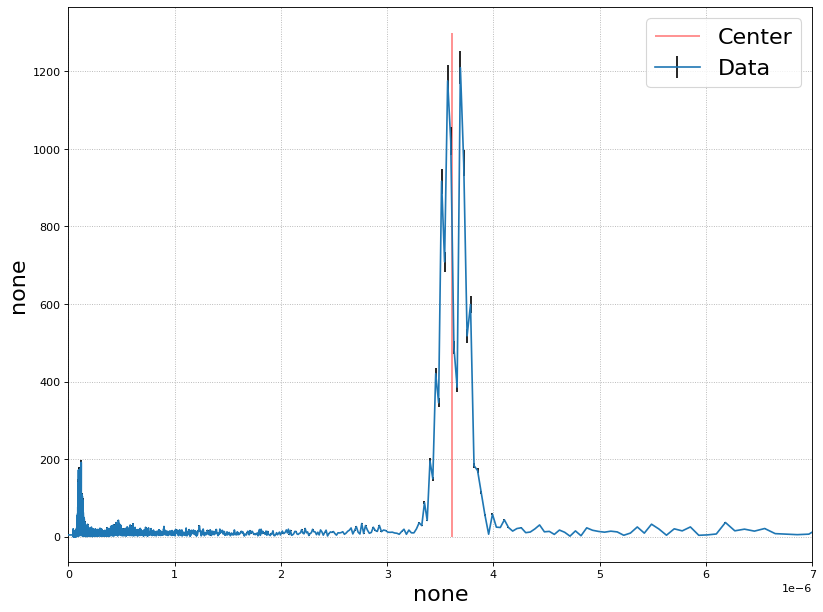

In [25]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)
fft_err = np.fft.fft(yerr)

peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

f.figsize(1)

plt.errorbar(freqs, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='k',zorder=10,label='Data')
plt.xlim(0,0.7e-5)
plt.vlines(3.6114e-06,0,1300,colors="r",zorder=5,alpha = 0.5,label='Center')
f.form()

In [26]:
dat = [freqs, np.abs(fft_int),np.abs(fft_err)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i],dat[2][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 132
    # variables        = 3
    chi-square         = 89229.0502
    reduced chi-square = 691.698064
    Akaike info crit   = 866.133122
    Bayesian info crit = 874.781528
    R-squared          = 0.98663962
[[Variables]]
    amplitude:  1.7483e-04 +/- 5.1062e-05 (29.21%) (init = 0.0003775957)
    center:     3.6114e-06 +/- 1.3484e-08 (0.37%) (init = 3.604374e-06)
    sigma:      1.2122e-07 +/- 8.8662e-09 (7.31%) (init = 1.041552e-07)
    fwhm:       2.8545e-07 +/- 2.0878e-08 (7.31%) == '2.3548200*sigma'
    height:     575.387813 +/- 199.331674 (34.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = -0.687
    C(amplitude, center) = 0.272
    C(center, sigma)     = -0.125


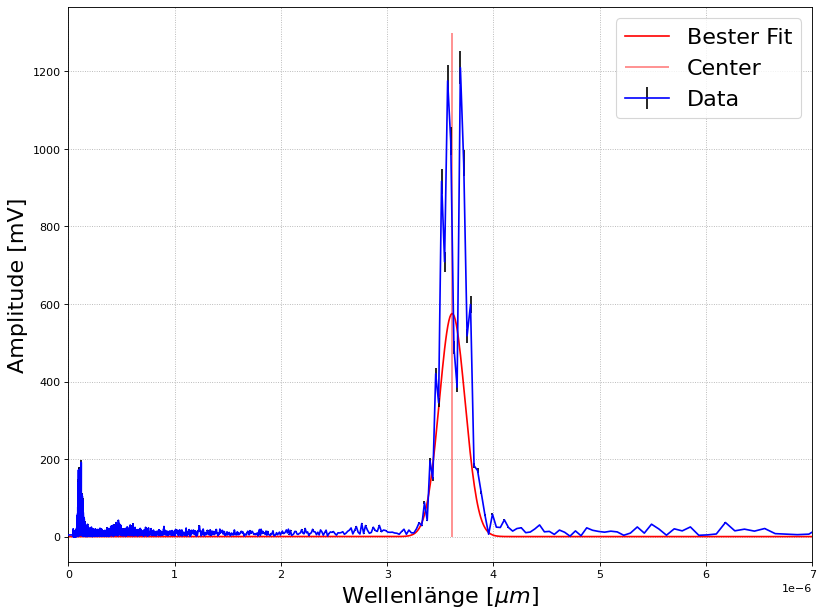

In [27]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)


res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],dat_sorted[2,von:bis])

print(res.fit_report())


f.figsize(1)

plt.errorbar(freqs, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='k',zorder=10,label='Data',fmt='b')
plt.plot(np.arange(0,7e-6,1e-8),res.eval(x=np.arange(0,7e-6,1e-8)),color='r',label='Bester Fit')
plt.xlim(0,0.7e-5)
plt.vlines(3.6114e-06,0,1300,colors="r",zorder=5,alpha = 0.5,label='Center')
f.form(xlabel=f'Wellenlänge [$\mu m$]',ylabel='Amplitude [mV]',name='Res/A5_fftfit.pdf')

In [28]:
#1/e breite
print('1/e Breite')
eb3 = ufloat(res.params["fwhm"].value,res.params["fwhm"].stderr)/ (2*np.log(2)**0.5)*2
print(eb3.format(':1.5'))
print('1/e höhe')
print(res.params['height'].value/m.e)
print('Kontrolle 1/e breite in fit eingesetzt')
print(res.eval(x=res.params['center'].value-eb3.n/2))

1/e Breite
3.4286e-07+/-0.2508e-07
1/e höhe
211.67334698708078
Kontrolle 1/e breite in fit eingesetzt
211.6733446839567
